In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [14]:
data = pd.read_csv("../Dataset/car_evaluation/car.data", header=None)
data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [17]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

# 인코딩

In [20]:
le = LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [22]:
X = data.iloc[:,0:6].values
y = data.iloc[:, 6].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0)

In [23]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]], dtype=int64)

In [24]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [25]:
X.shape

(1728, 6)

In [26]:
Y.shape

(1728, 4)

In [28]:
model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 154 (616.00 Byte)
Trainable params: 154 (616.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 5ms/step - loss: 1.1781 - accuracy: 0.4537 - val_loss: 1.0209 - val_accuracy: 0.6879
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.9299 - accuracy: 0.6954 - val_loss: 0.8915 - val_accuracy: 0.6936
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8416 - accuracy: 0.7019 - val_loss: 0.8407 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8041 - accuracy: 0.7019 - val_loss: 0.8241 - val_accuracy: 0.6936
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7856 - accuracy: 0.7019 - val_loss: 0.8109 - val_accuracy: 0.6936
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7700 - accuracy: 0.7019 - val_loss: 0.7978 - val_accuracy: 0.6936
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7531 - accuracy: 0.7019 - val_loss: 0.7844 - val_accuracy: 0.6936
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8278 - val_loss: 0.4275 - val_accuracy: 0.8064
Epoch 60/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8263 - val_loss: 0.4245 - val_accuracy: 0.8150
Epoch 61/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8292 - val_loss: 0.4276 - val_accuracy: 0.7948
Epoch 62/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8307 - val_loss: 0.4138 - val_accuracy: 0.8035
Epoch 63/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8336 - val_loss: 0.4095 - val_accuracy: 0.8121
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8415 - val_loss: 0.4078 - val_accuracy: 0.8064
Epoch 65/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8423 - val_loss: 0.4034 - val_accuracy: 0.8035
Epoch 

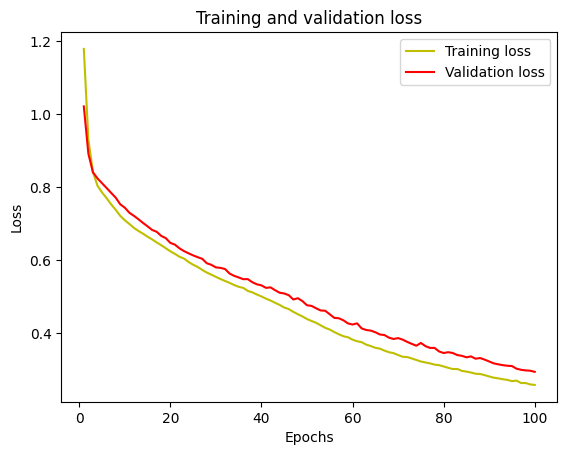

In [30]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

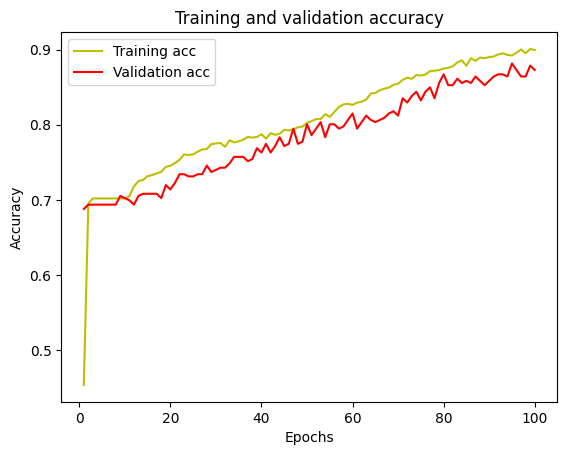

In [31]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        79
           1       0.00      0.00      0.00        17
           2       0.95      0.96      0.95       240
           3       0.50      0.70      0.58        10

    accuracy                           0.87       346
   macro avg       0.54      0.62      0.58       346
weighted avg       0.84      0.87      0.85       346

[[ 65   0  12   2]
 [ 13   0   0   4]
 [  9   0 230   1]
 [  3   0   0   7]]


C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
